In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# SciKit

本章主要讨论：
    
    Scikitimage：比`scipy.ndimage`更强的图像处理模块。
    Scikitlearn：机器学习包。
    
## Scikit-Image

SciPy和`ndimage`类包含了非常多的处理多维数据的工具，如过滤（高斯平滑）傅利叶变换，形态（二进制侵蚀），插值和测量。可以组合这些工具进行更复杂的处理。Scikit-image正是这一类高级模块，它包含了颜色空间转换、图像强度调整算法、特征检测、锐化和降噪，图像读写等。

### 动态阀值
图像处理中的常见的问题是对图像内容进行分块。通常的阀值技术在图像背景色较为平坦时工作得较好。但实际上图像的背景经常是变化的。这种情况下使用scikit-image提供的自适应阀值就能比较容易处理。

下例我们使用生成的图像，这个图像的背景不是统一的，图像上包含随机放置的点。使用自适应阀值技术我们可以从背景中提取出这些白点。


/Users/zhujie/.virtualenvs/deeplearn/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


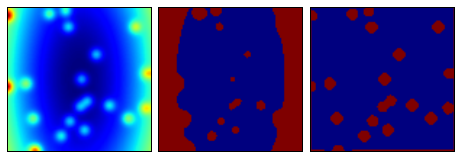

In [4]:
import skimage.filter as skif
import scipy.ndimage as ndimage

#生成带点的图像
x = np.random.uniform(low=0,high=100,size=20).astype(int)
y = np.random.uniform(low=0,high=-100,size=20).astype(int)

#创建非平坦的背景
func = lambda x,y: x**2 + y**2
grid_x,grid_y = np.mgrid[-1:1:100j,-2:2:100j]
bkg = func(grid_x,grid_y)
bkg = bkg / np.max(bkg)

#创建点
clean = np.zeros((100,100))
clean[(x,y)] += 5
clean = ndimage.gaussian_filter(clean,3)
clean = clean/np.max(clean)

#合成图像
fimg = bkg + clean
fimg = fimg / np.max(fimg)

#最小相邻对象的大小
block_size = 3

#动态阀值
adaptive_cut = skif.threshold_adaptive(fimg,block_size,offset=0)

#全局阀值
global_thresh = skif.threshold_otsu(fimg)
global_cut = fimg > global_thresh

fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.05,wspace=0.05)

#原图
ax1 = fig.add_subplot(131)
ax1.imshow(fimg)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

#使用固定阀值
ax2 = fig.add_subplot(132)
ax2.imshow(global_cut)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

#使用动态阀值
ax3 = fig.add_subplot(133)
ax3.imshow(adaptive_cut)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

plt.show()

### 局部极大值

通过使用`skiimage.morphology.is_local_maximum`可以查找出局部极值。可以用于在图像中查找最亮或最暗的点。


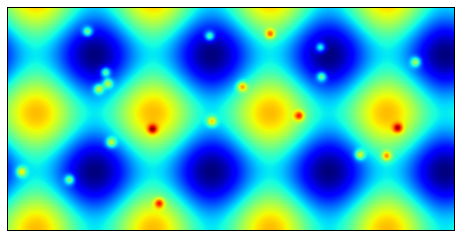

In [5]:
#import skimage.morphology as morph
import skimage.feature as feature

# Generating data points with a non-uniform background
x = np.random.uniform(low=0, high=200, size=20).astype(int)
y = np.random.uniform(low=0, high=400, size=20).astype(int)

# Creating image with non-uniform background
func = lambda x, y: np.cos(x)+ np.sin(y)
grid_x, grid_y = np.mgrid[0:12:200j, 0:24:400j]
bkg = func(grid_x, grid_y)
bkg = bkg / np.max(bkg)

# Creating points
clean = np.zeros((200,400))
clean[(x,y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean / np.max(clean)

# Combining both the non-uniform background
# and points
fimg = bkg + clean
fimg = fimg / np.max(fimg)

# Calculating local maxima
#新版本已经没有morph.is_local_maximum
#lm1 = morph.is_local_maximum(fimg)
lm1 = feature.peak_local_max(fimg)
x1, y1 = np.where(lm1.T == True)

# Creating figure to show local maximum detection
# rate success
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(111)
ax.imshow(fimg)
ax.scatter(x1, y1, s=100, facecolor='none', edgecolor='#009999')
ax.set_xlim(0,400)
ax.set_ylim(0,200)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

## Scikit-Learn


### 线性回归
Scikit-learn包含了大量工具，如Lasso和岭回归。这里只演示普通最小二乘回归函数。
$$
\min_{w} \lVert X \beta - y \rVert
$$
$w$ 是系数集，它的数量取决于数据的维度，$ N(系数) = MD - 1,M > 1$ 并且为整数。下例计算3D空间中的一个线性拟合平面，使用`LinearRegression`来训练数据集。


[-10.25691752  90.5463984 ]
[ 350.86036386]
0.949827492261


/Users/zhujie/.virtualenvs/deeplearn/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<IPython.core.display.Javascript object>


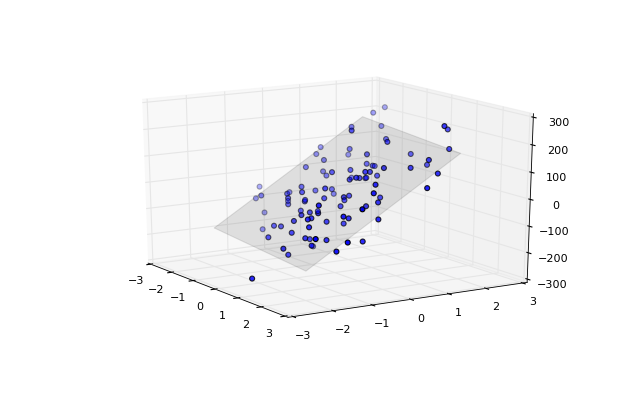

In [8]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.datasets.samples_generator import make_regression

#生成用于训练和测试的数据集
X, y = make_regression(n_samples=100, n_features=2, n_informative=1,\
                         random_state=0, noise=50)

# X and y are values for 3D space. We first need to train
# the machine, so we split X and y into X_train, X_test,
# y_train, and y_test. The *_train data will be given to the
# model to train it.
X_train, X_test = X[:80], X[-20:]
y_train, y_test = y[:80], y[-20:]

# Creating instance of model
regr = linear_model.LinearRegression()

# Training the model
regr.fit(X_train, y_train)

# Printing the coefficients
print(regr.coef_)
# [-10.25691752  90.5463984 ]

# Predicting y-value based on training
X1 = np.array([1.2, 4])
print(regr.predict(X1))
# 350.860363861

# With the *_test data we can see how the result matches
# the data the model was trained with.
# It should be a good match as the *_train and *_test
# data come from the same sample. Output: 1 is perfect
# prediction and anything lower is worse.
print(regr.score(X_test, y_test))
# 0.949827492261

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)

# Data
ax.scatter(X_train[:,0], X_train[:,1], y_train, facecolor='#00CC00')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='#FF7800')

# Function with coefficient variables
coef = regr.coef_
line = lambda x1, x2: coef[0] * x1 + coef[1] * x2

grid_x1, grid_x2 = np.mgrid[-2:2:10j, -2:2:10j]
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2),
                alpha=0.1, color='k')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.zaxis.set_visible(False)
plt.show()

### 聚类
SciPy提供了两个用于聚类分析的包矢量量化(kmeans)和分层聚类(hierarchy)。Scikit-learn与SciPy中的kmeans类似功能的是DBSCAN算法，它用于通过给定半径查找核心点，它比`kmeans`相比，对包含噪声的数据处理效果更好。

In [7]:

if False:"""DBSCAN库有变化，fit方法参数不正确
from scipy.spatial import distance
from sklearn.cluster import DBSCAN

# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(50, 2)

# Creating a uniformly distributed background
u1 = np.random.uniform(low=-10, high=10, size=100)
u2 = np.random.uniform(low=-10, high=10, size=100)
c3 = np.column_stack([u1, u2])

# Pooling all the data into one 150 x 2 array
data = np.vstack([c1, c2, c3])

# Calculating the cluster with DBSCAN function.
# db.labels_ is an array with identifiers to the
# different clusters in the data.
db = DBSCAN().fit(data, eps=0.95, min_samples=10)

labels = db.labels_

# Retrieving coordinates for points in each
# identified core. There are two clusters
# denoted as 0 and 1 and the noise is denoted
# as -1. Here we split the data based on which
# component they belong to.
dbc1 = data[labels == 0]
dbc2 = data[labels == 1]
noise = data[labels == -1]

# Setting up plot details
x1, x2 = -12, 12
y1, y2 = -12, 12

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(c1[:,0], c1[:,1], lw=0.5, color='#00CC00')
ax1.scatter(c2[:,0], c2[:,1], lw=0.5, color='#028E9B')
ax1.scatter(c3[:,0], c3[:,1], lw=0.5, color='#FF7800')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_xlim(x1, x2)
ax1.set_ylim(y1, y2)
ax1.text(-11, 10, 'Original')

ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(dbc1[:,0], dbc1[:,1], lw=0.5, color='#00CC00')
ax2.scatter(dbc2[:,0], dbc2[:,1], lw=0.5, color='#028E9B')
ax2.scatter(noise[:,0], noise[:,1], lw=0.5, color='#FF7800')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.text(-11, 10, 'DBSCAN identified')

plt.show()
"""